# 블로그에 존재하는 데이터를 수집 후, 워드클라우드 제작하기!

In [105]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd

In [107]:
# 1. 블로그 검색 결과 수집
res = req.get('https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=LG%ED%99%88%EB%B8%8C%EB%A3%A8+%22%EB%82%B4%EB%8F%88%EB%82%B4%EC%82%B0%22%2C+-%EA%B4%91%EA%B3%A0&oquery=LG%ED%99%88%EB%B8%8C%EB%A3%A8+%22%EB%82%B4%EB%8F%88%EB%82%B4%EC%82%B0%22&tqi=i39PAdqptbNssivdU94ssssssCw-241845')
res

<Response [200]>

In [109]:
# 2. 데이터 파싱
soup = bs(res.text, "lxml")
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content='LG홈브루 "내돈내산", -광고 : 네이버 블로그검색' property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'LG홈브루 &quot;내돈내산&quot;, -광고'의 네이버 블로그검색 결과입니다." property="og:description"/> <meta content="'LG홈브루 &quot;내돈내산&quot;, -광고'의 네이버 블로그검색 결과입니다." lang="ko" name="description"/> <title>LG홈브루 "내돈내산", -광고 : 네이버 블로그검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_250109

In [111]:
# 3. 현재 화면에 있는 블로그 링크 수집
# 링크만 저장하는 리스트 제작
link = soup.select("div.detail_box > div.title_area > a")
link[0]['href']

'https://blog.naver.com/rna6983/223004192821'

In [ ]:
#main_pack > section.sc_new.sp_nblog._fe_view_root._prs_blg._sp_nblog > div.api_subject_bx > ul > li > div > div.detail_box > div.title_area > a

In [113]:
link_list = []
for i in link:
    link_list.append(i['href'])

link_list  #--> blog가 아닌 post 있음

['https://blog.naver.com/rna6983/223004192821',
 'https://blog.naver.com/dannykgu/223699790418',
 'https://blog.naver.com/rma3217/223607892378',
 'https://blog.naver.com/doridohe/223083314798',
 'https://blog.naver.com/yeonsoo1031/223088176535',
 'https://post.naver.com/viewer/postView.naver?volumeNo=36475503&memberNo=516856&vType=VERTICAL',
 'https://blog.naver.com/wlwn111/223052106732',
 'https://blog.naver.com/suandhyun/223240841460',
 'https://blog.naver.com/gd6199/222796662289',
 'https://blog.naver.com/brenda91kr/223125398976',
 'https://blog.naver.com/euni4mom/223577925795',
 'https://blog.naver.com/njnje39/223147256035',
 'https://blog.naver.com/kwnrj33/222793201689',
 'https://blog.naver.com/yenammae__/223228408681',
 'https://blog.naver.com/beautyim1115/222875636465',
 'https://blog.naver.com/letslookandeat/223307273422',
 'https://blog.naver.com/purnsongei/222990529878',
 'https://blog.naver.com/kkcjswo/223385812202',
 'https://blog.naver.com/universe_my/223180022171',
 'htt

In [115]:
# 블로그로만 다시 저장
blog_list = []

for i in link:
    # 데이터 속에 blog라는 글자가 포함 되있는 경우만 저장
    if "blog" in i['href']:
        blog_list.append(i['href'])

blog_list

['https://blog.naver.com/rna6983/223004192821',
 'https://blog.naver.com/dannykgu/223699790418',
 'https://blog.naver.com/rma3217/223607892378',
 'https://blog.naver.com/doridohe/223083314798',
 'https://blog.naver.com/yeonsoo1031/223088176535',
 'https://blog.naver.com/wlwn111/223052106732',
 'https://blog.naver.com/suandhyun/223240841460',
 'https://blog.naver.com/gd6199/222796662289',
 'https://blog.naver.com/brenda91kr/223125398976',
 'https://blog.naver.com/euni4mom/223577925795',
 'https://blog.naver.com/njnje39/223147256035',
 'https://blog.naver.com/kwnrj33/222793201689',
 'https://blog.naver.com/yenammae__/223228408681',
 'https://blog.naver.com/beautyim1115/222875636465',
 'https://blog.naver.com/letslookandeat/223307273422',
 'https://blog.naver.com/purnsongei/222990529878',
 'https://blog.naver.com/kkcjswo/223385812202',
 'https://blog.naver.com/universe_my/223180022171',
 'https://blog.naver.com/032107/223488789229',
 'https://blog.naver.com/mintlime0_0/222995714107',
 'ht

### 우리가 필요한건?
- 단순한 블로그의 링크가 아니다.
- 블로그 속에 있는 블로그 내용이 필요
- 사람이라면? 블로그 클릭(요청) -> 블로그내용 수집 -> 클릭 -> 수집 -> 반복문
- 반복할 코드를 먼저 작성해보자

In [145]:
# 첫번째 블로그 내용 요청
res = req.get(blog_list[0])
# 데이터 파싱
soup = bs(res.text,"lxml")

In [151]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- [D] XHTML 1.0 형식에 맞게 언어속성 추가--><html lang="ko" xml:lang="“ko“" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="noindex,follow" name="robots"/>
<meta content="always" name="referrer"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<link href="https://rss.blog.naver.com/rna6983.xml" rel="alternate" title="RSS feed for rna6983 Blog" type="application/rss+xml"/>
<link href="https://blog.naver.com/NBlogWlwLayout.naver?blogId=rna6983" rel="wlwmanifest" type="application/wlwmanifest+xml"/>
<title>다디단 메로나 : 네이버 블로그</title>
</head>
<script charset="UTF-8" src="https://ssl.pstatic.net/t.static.blog/mylog/versioning/Fra

In [147]:
#블로그의 본문 수집
# 요청이 200 이였는데? 선택자가 문제 없었는데? 안나와? 그럼?
# iframe을 검사
# soup.selet("div > div.se-main-container") # id제거

TypeError: 'NoneType' object is not callable

In [153]:
soup.select_one("#mainFrame")['src']

'/PostView.naver?blogId=rna6983&logNo=223004192821&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false'

In [155]:
# iframe태그를 찾아오기
url = "https://blog.naver.com"+soup.select_one("#mainFrame")['src']
url

'https://blog.naver.com/PostView.naver?blogId=rna6983&logNo=223004192821&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false'

In [157]:
# 실제 데이터를 다시 요청하기
res = req.get(url)
soup = bs(res.text,"lxml")
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="ko">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-491376861_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="LG홈브루 수제맥주 기계 내돈내산 리얼 후기 맥치광이 필수템!" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyMzAyMDNfNjkg/MDAxNjc1Mzg2OTA3NjE4.SC9m5vnshInsRZSiS1Hzr_QSCGdJ3Ay6exDNoHXYNsAg.wpJBAQMaXz6EvqMTy_lHKZBgdjjERMu124uq8jT16Y4g.JPEG.rna6983/IMG_5698.jp

In [197]:
# 블로그 본문 수집
blog_data = soup.select_one("div > div.se-main-container")
blog_data

<div class="se-main-container">
<div class="se-component se-text se-l-default" id="SE-B8B3DF6B-1271-4CAC-8D59-54A89AEBE6D1">
<div class="se-component-content">
<div class="se-section se-section-text se-l-default">
<div class="se-module se-module-text">
<!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-left" id="SE-D817FDEE-4369-427B-83D3-580F7E4BE53A" style=""><span class="se-fs- se-ff-" id="SE-8FD3DA52-A011-4D9B-8907-4766C41D53AE" style="">술을 좋아하는 저희 부부에게 딱 맞는 LG홈브루 바로 수제맥주 기계 입니다!!!</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-left" id="SE-4E72E359-E8F6-4B72-9C0B-9A02F26031C5" style=""><span class="se-fs- se-ff-" id="SE-D1E95FAF-09E9-4034-99A7-63716B064F74" style="">이걸 전부터 사고싶었는데 금액대가 너무 부담되기도 하구.. 여러모로 고민이 많이 되더라구요</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-left" id="SE-791C425A-2FA6-43DD-ADA0-FCD0538AF7C9" style=""><span class="se-fs- se-ff-" id="SE-5B3643

In [199]:
# 정규표현식을 통한 불필요한 글자 지우기!
import re
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w)
  w = w.strip()
  return w

In [207]:
# 수집한 블로그 내용에서 불필요한 글자 제거
preprocess_sentence_kr(blog_data).replace("저작자 명시 필수 영리적 사용 불가 내용 변경 불가 저작자 명시 필수 영리적 사용 불가 내용 변경 불가 태그 취소 확인 공감 이 글에 공감한 블로거 열고 닫기 댓글 15 이 글에 댓글 단 블로거 열고 닫기 인쇄 댓글쓰기 1 1 이전 다음","")

'술을 좋아하는 저희 부부에게 딱 맞는 홈브루 바로 수제맥주 기계 입니다!!!이걸 전부터 사고싶었는데 금액대가 너무 부담되기도 하구.. 여러모로 고민이 많이 되더라구요그래서 망설이고만 있었는데요! 작년 결혼기념일에 1주년을 기념해서 우리 부부에게 주는 선물로 직접 샀슴미당 !부부돈부부산 주변에서 다들 가격듣고 미쳤다구 했지만.. 한번 사는 인생인데 해보고싶은거 해봐야지 하는 마음이 커서 그냥 샀어용 오자마자 바로 찍어둔건 없네요?저희는 오브제 화이트로 선택했어요! 근데 아직 옆에 비닐 안벗겨서 무광 아니고 유광처럼 보여요산지 3개월정도 됐는데 아직 안벗겼슴미다 지가 떨어질때까지 아마 안벗길 것 같아요 와서 기사님이 설치를 해주시는데 이때 캡슐팩이 하나 있어야해요!와서 설치 해주시면서 한번 가동을 해주시기 때문에 캡슐팩을 미리 사두고 기사님을 부르셔야된대요!!저희는 팩 구매하고 출고까지 3 5일 정도 걸린대서 기사님 일정을 좀 늦게 잡아뒀는데 캡슐팩 2일만에 왔고요? 3일동안 기계없이 구냥 캡슐팩만 가진사람 되버렸구요? 제가 출근해있는동안 오빠가 기사님과 만남을 가지고 가동을 해두었더라구요!!!저희의 홈브루 수제맥주 기계 첫 맥주는 위트 였어요 팩은 생각보다 비싸요.. 43000원 정도?기계가 140정도니까.. 암튼 엄청 값진 맥주를 만들어 먹고있는 셈입니다!!구래도 밖에나가면 수제맥주 350 500에 8000 10000원 하는거 생각하면 싸다고 생각해요? 아무도 태클걸지 마세요 1시간 남았을때부터 대기타고 있었슴다!!!!!!저희는 처음에는 숙성까지 다 해서 먹는걸로!!! 이게 전문가 모드가 있는데 전문가모드로 하면 병입을 해서 탄산화, 발효를 할 수 있어요 그러면 다른 맥주를 더 만들 수 있어서 좋더라구요!집안에 작은 맥주 공장을 만들어두었어요 맥주에 미친자 맥치광이 임미당 이렇게 바로 뽑아서 먹어봤어요!! 이날 저녁에 시댁에 가기로 했는데 낮술 빨고 갔슈완성되기 한시간전부터 앞에서 죽치고 있었는데 마셔야죠!!!!!도수는 4 5도랬는데 생각보다 더 진해서 그런

---

In [220]:
import time

In [235]:
# 반복문을 통해서 전체 블로그 수집
for i in range(len(blog_list)):
    res = req.get(blog_list[i])  # 첫 번째 블로그의 내용 요청
    soup = bs(res.text,'lxml')
    url = 'https://blog.naver.com' +soup.select_one('#mainFrame')['src']  # iframe
    res = req.get(url)
    soup = bs(res.text,'lxml')

    try: 
        blog_data = soup.select_one('div > div.se-main-container').text  # #post-view223004192821 > div > div.se-main-container
    except: 
        blog_data = soup.select_one("#postViewArea").text
    # 불필요한 내용 제거
    content += preprocess_sentence_kr(blog_data).replace("저작자 명시 필수 영리적 사용 불가 내용 변경 불가 저작자 명시 필수 영리적 사용 불가 내용 변경 불가 태그 취소 확인 공감 이 글에 공감한 블로거 열고 닫기 댓글 15 이 글에 댓글 단 블로거 열고 닫기 인쇄 댓글쓰기 1 1 이전 다음","")

In [236]:
content

'술을 좋아하는 저희 부부에게 딱 맞는 홈브루 바로 수제맥주 기계 입니다!!!이걸 전부터 사고싶었는데 금액대가 너무 부담되기도 하구.. 여러모로 고민이 많이 되더라구요그래서 망설이고만 있었는데요! 작년 결혼기념일에 1주년을 기념해서 우리 부부에게 주는 선물로 직접 샀슴미당 !부부돈부부산 주변에서 다들 가격듣고 미쳤다구 했지만.. 한번 사는 인생인데 해보고싶은거 해봐야지 하는 마음이 커서 그냥 샀어용 오자마자 바로 찍어둔건 없네요?저희는 오브제 화이트로 선택했어요! 근데 아직 옆에 비닐 안벗겨서 무광 아니고 유광처럼 보여요산지 3개월정도 됐는데 아직 안벗겼슴미다 지가 떨어질때까지 아마 안벗길 것 같아요 와서 기사님이 설치를 해주시는데 이때 캡슐팩이 하나 있어야해요!와서 설치 해주시면서 한번 가동을 해주시기 때문에 캡슐팩을 미리 사두고 기사님을 부르셔야된대요!!저희는 팩 구매하고 출고까지 3 5일 정도 걸린대서 기사님 일정을 좀 늦게 잡아뒀는데 캡슐팩 2일만에 왔고요? 3일동안 기계없이 구냥 캡슐팩만 가진사람 되버렸구요? 제가 출근해있는동안 오빠가 기사님과 만남을 가지고 가동을 해두었더라구요!!!저희의 홈브루 수제맥주 기계 첫 맥주는 위트 였어요 팩은 생각보다 비싸요.. 43000원 정도?기계가 140정도니까.. 암튼 엄청 값진 맥주를 만들어 먹고있는 셈입니다!!구래도 밖에나가면 수제맥주 350 500에 8000 10000원 하는거 생각하면 싸다고 생각해요? 아무도 태클걸지 마세요 1시간 남았을때부터 대기타고 있었슴다!!!!!!저희는 처음에는 숙성까지 다 해서 먹는걸로!!! 이게 전문가 모드가 있는데 전문가모드로 하면 병입을 해서 탄산화, 발효를 할 수 있어요 그러면 다른 맥주를 더 만들 수 있어서 좋더라구요!집안에 작은 맥주 공장을 만들어두었어요 맥주에 미친자 맥치광이 임미당 이렇게 바로 뽑아서 먹어봤어요!! 이날 저녁에 시댁에 가기로 했는데 낮술 빨고 갔슈완성되기 한시간전부터 앞에서 죽치고 있었는데 마셔야죠!!!!!도수는 4 5도랬는데 생각보다 더 진해서 그런

## 크롤링할 때 주의점
- 요청을 빠르게 보내면 서버에게는 부담
- 응답이 잘못 넘어 올 수도 있음
- 요청과 응답을 할 때 쉬는 시간이 필요 -> time.sleep()
- 같은 사이트여도 태그의 구조가 다를 수 있음
- 반복할 때 오류가 발생한다면 -> 구조가 바뀌었다 -> 예외처리
  - 예외처리 -> try(시도할 코드) / except(오류가 났을 때 처리할 코드)

In [243]:
# 수집한 블로그 데이터로 워드클라우드 제작
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from kiwipiepy import Kiwi

In [245]:
# 키위 토큰화
kiwi = Kiwi()

In [251]:
result = kiwi.tokenize(content)
result[:3]

[Token(form='술', tag='NNG', start=0, len=1),
 Token(form='을', tag='JKO', start=1, len=1),
 Token(form='좋아하', tag='VV', start=3, len=3)]

In [253]:
# 명사만 추출해서 저장
noun_list = []
for i in result:
    if i.tag in ['NNG','NNP']: # 일반명서, 고유명사
        noun_list.append(i.form)

In [255]:
noun_list[:10]

['술', '부부', '홈브루', '수제', '맥주', '기계', '전', '금액', '부담', '고민']

In [257]:
# 명사들의 개수를 카운트
from collections import Counter

count = Counter(noun_list)
count

Counter({'맥주': 1119,
         '홈브루': 700,
         '캡슐': 468,
         '맛': 266,
         '수제': 218,
         '집': 200,
         '구매': 199,
         '기계': 179,
         '세척': 176,
         '정도': 170,
         '때': 169,
         '제조': 159,
         '맥': 145,
         '사용': 141,
         '후기': 137,
         '후': 133,
         '가격': 125,
         '브루잉': 125,
         '완성': 123,
         '물': 119,
         '돈': 111,
         '생각': 108,
         '즙': 103,
         '일': 99,
         '숙성': 98,
         '잔': 98,
         '향': 95,
         '가능': 94,
         '보관': 94,
         '가전': 94,
         '방문': 93,
         '설치': 92,
         '거품': 91,
         '다음': 88,
         '기간': 88,
         '탄산': 84,
         '필스너': 83,
         '시간': 83,
         '기사': 79,
         '시작': 78,
         '제품': 78,
         '카페': 76,
         '캔': 72,
         '스타우트': 71,
         '준비': 70,
         '술': 67,
         '처음': 67,
         '종류': 67,
         '발효': 65,
         '배송': 65,
         '모드': 62,
         '제조기':

In [263]:
# 상위 Top100개의 명사만 추출
top = count.most_common(100)

In [265]:
# 2글자 이상의 명사로 새로운 리스트 제작(필수는 아니다)
data = []
for i in top:
    if len(i[0]) > 1:
        data.append(i)

In [267]:
data

[('맥주', 1119),
 ('홈브루', 700),
 ('캡슐', 468),
 ('수제', 218),
 ('구매', 199),
 ('기계', 179),
 ('세척', 176),
 ('정도', 170),
 ('제조', 159),
 ('사용', 141),
 ('후기', 137),
 ('가격', 125),
 ('브루잉', 125),
 ('완성', 123),
 ('생각', 108),
 ('숙성', 98),
 ('가능', 94),
 ('보관', 94),
 ('가전', 94),
 ('방문', 93),
 ('설치', 92),
 ('거품', 91),
 ('다음', 88),
 ('기간', 88),
 ('탄산', 84),
 ('필스너', 83),
 ('시간', 83),
 ('기사', 79),
 ('시작', 78),
 ('제품', 78),
 ('카페', 76),
 ('스타우트', 71),
 ('준비', 70),
 ('처음', 67),
 ('종류', 67),
 ('발효', 65),
 ('배송', 65),
 ('모드', 62),
 ('제조기', 62),
 ('이용', 62),
 ('선택', 61),
 ('레시피', 61),
 ('진행', 61),
 ('에일', 60),
 ('체험', 59),
 ('이번', 58),
 ('오브제', 55),
 ('전자', 55),
 ('확인', 55),
 ('제거', 53),
 ('취향', 53),
 ('위트', 52),
 ('매장', 52),
 ('패키지', 51),
 ('라거', 50),
 ('사람', 47),
 ('추가', 47),
 ('추천', 47),
 ('동안', 46),
 ('업데이트', 46),
 ('방법', 45),
 ('엘지', 44),
 ('투입', 44),
 ('부부', 43),
 ('선물', 43),
 ('맛집', 43),
 ('출시', 42),
 ('과정', 42),
 ('하우스', 42),
 ('자리', 41),
 ('단점', 41),
 ('참고', 41),
 ('리뷰', 40),
 ('구입', 40),
 ('레드', 39

In [269]:
# 워드 클라우드 생성
wc = WordCloud(font_path='C:/Windows/Fonts/gulim.ttc', background_color='white').generate_from_frequencies(dict(data))

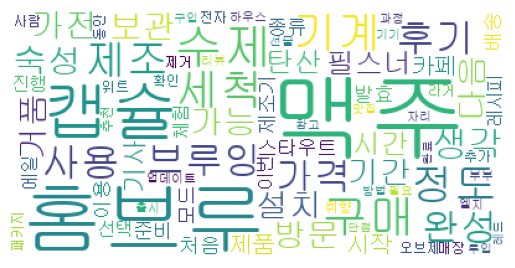

In [275]:
plt.imshow(wc)
plt.axis("off")
plt.show()